In [94]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime

In [95]:
#El dataframe lo cargamos en una sola fila
Taller_1= pd.read_csv('Data_Taller_1.csv',header=None,sep='\n')

In [96]:
#Se separan por "comas"
Taller_1=Taller_1[0].str.split(',',expand=True)

In [97]:
#Convertimos la primera fila que tiene el encabezado a columnas
Taller_1.rename(columns=Taller_1.iloc[0], inplace = True)

In [98]:
#Eliminamos los datos que no cumplen con el formato en las diferentes columnas
Taller_1=Taller_1.drop([1817,1925,86,180,1061,76,770,235,483,1775,483,1775,211,1266,1119,1688,107,1883,1616,279,1619,848,630,1588,1241,1848,1976,947,773,341,795,1835,1583,1389,1509,651,676,1869,1691,872,655,1349,1950,1279,324,762,554,1831,526,1232])

In [99]:
# se cambia el nombre de titulo quitando el caracter ";"

Taller_1.rename({'genre;' :'genre'},axis=1,inplace=True)

Taller_1=Taller_1.drop(0)

In [100]:
#Realizamos su respectio analisis para hacer transformaciones y 
#cambiamos los tipos de datos de diferentes columnas para poder hacer cálculos determinados

#Los valores vacios los reemplazamos or 0
Taller_1_limpio=Taller_1.replace("",0)
Taller_1_limpio['duration_ms']= Taller_1_limpio['duration_ms'].replace({'':'0'}, regex=True)
#Convertimos este tipo de colmnas a float 
Taller_1_limpio['duration_ms']=Taller_1_limpio['duration_ms'].astype(float)
Taller_1_limpio['popularity']=Taller_1_limpio['popularity'].astype(float)
Taller_1_limpio['energy']=Taller_1_limpio['energy'].astype(float)
Taller_1_limpio['valence']=Taller_1_limpio['valence'].astype(float)
Taller_1_limpio['tempo']=Taller_1_limpio['tempo'].astype(float)

Taller_1_limpio['instrumentalness']=Taller_1_limpio['instrumentalness'].astype(float)

#Realizamos calidad de datos en la columna genere para que no tenga caracteres especiales
Taller_1_limpio['genre']=Taller_1_limpio['genre'].str.replace('"','')
Taller_1_limpio['genre']=Taller_1_limpio['genre'].str.replace(';','')

In [101]:
#Primer punto

#Creamos un DataFrame cque solo contenga los datos de el 2013 en adelante 
#para realizar el anáisis necesario que en este caso es sacar los aristas mas activos
#Se realizo una funcion que permita encontar los artistas que mas canciones han sacado 
#a lo largo de los años, Drake y artistas de genero pop son los que mas tienen tendencia 
#a sacar nueva musica
Activos=Taller_1_limpio[(Taller_1['year']>'2012')]
Activos['artist'].value_counts().head(10)

Drake               15
Ariana Grande       13
Taylor Swift        10
Calvin Harris        9
Ed Sheeran           9
Post Malone          9
Selena Gomez         9
The Weeknd           8
The Chainsmokers     8
Avicii               7
Name: artist, dtype: int64

In [102]:
#Segundo punto
#Se crea un dataFrame para cada genero para luego realizar su analisis
#Se guarda en una variable el promedio de la duracion de la musica de los diferentes 
#generos para luego bsrvar que la duracion promedio de e genero latin es menor respecto 
# a folk/acoustic.

Latin=Taller_1_limpio[(Taller_1_limpio['genre']=='latin')]
Folk_Acoustic=Taller_1_limpio[(Taller_1_limpio['genre']=='Folk/Acoustic')]

latin_mean=Latin['duration_ms'].mean()
Folk_Acoustic_mean=Folk_Acoustic['duration_ms'].mean()
print("La media de genero Folk/Acoustic es:")
print(Folk_Acoustic_mean)
print("La media de genero latin es:")
print(latin_mean)
print(Folk_Acoustic_mean - Folk_Acoustic_mean )

La media de genero Folk/Acoustic es:
250755.0
La media de genero latin es:
226330.73333333334
0.0


AxesSubplot(0.125,0.125;0.775x0.755)


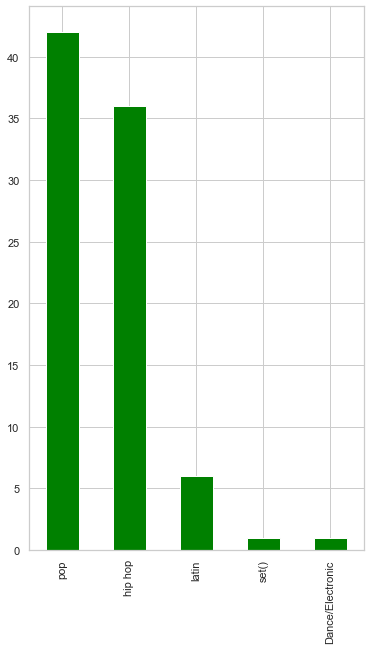

In [103]:
#Tercer punto
#Se toma un dataset para cada año que se pide, se realiza una grafica
#para cada año para su respectivo analisis


generos_2019=Taller_1_limpio[(Taller_1_limpio['year']=='2019')]
generos_2015=Taller_1_limpio[(Taller_1_limpio['year']=='2015')]
generos_2010=Taller_1_limpio[(Taller_1_limpio['year']=='2010')]
generos_2005=Taller_1_limpio[(Taller_1_limpio['year']=='2005')]
generos_2000=Taller_1_limpio[(Taller_1_limpio['year']=='2000')]

#para el año 2019 la musica pop tienede a ser la que mas canciones ha sacado
#esto lo podemos corraborar con el punto 1 donde los artistas pop son los mas activos 
print(generos_2019['genre'].value_counts().plot(kind='bar',color='green'))

AxesSubplot(0.125,0.125;0.775x0.755)


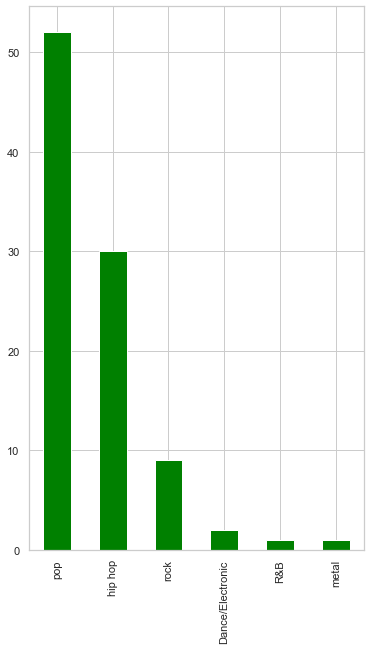

In [104]:

#en el año 2015 el pop comienza a superar al hip hop despues de mas de una decada

print(generos_2015['genre'].value_counts().plot(kind='bar',color='green'))

AxesSubplot(0.125,0.125;0.775x0.755)


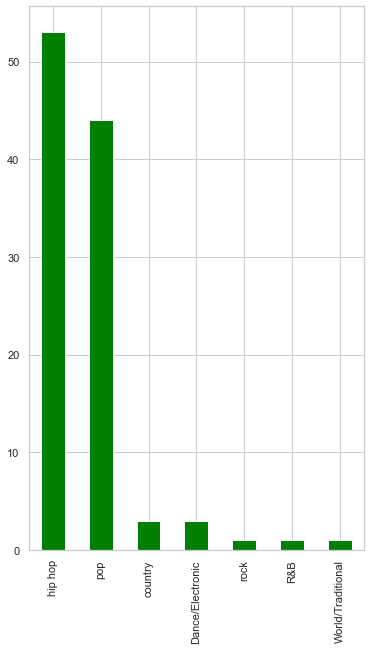

In [105]:
#en los años 2010 podemos observar que los demas generos que no sean hip hop 
# o pop tienen una gran dismunicion de prodcciones 

print(generos_2010['genre'].value_counts().plot(kind='bar',color='green'))

AxesSubplot(0.125,0.125;0.775x0.755)


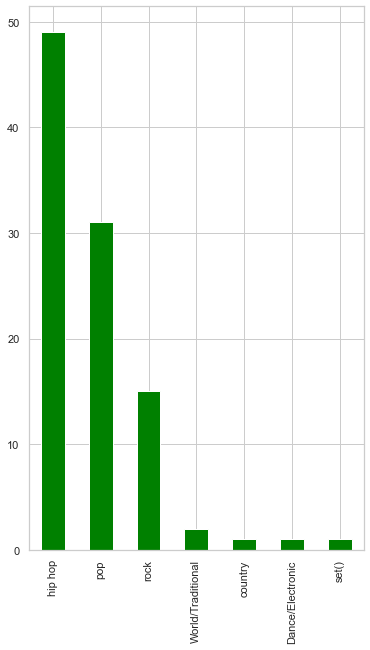

In [106]:

#En el año 2005 el hip hop supera al genero pop investigando respecto a los años 
#esto se debe al auge de artistas de genero urbano que estaban de moda


print(generos_2005['genre'].value_counts().plot(kind='bar',color='green'))

AxesSubplot(0.125,0.125;0.775x0.755)


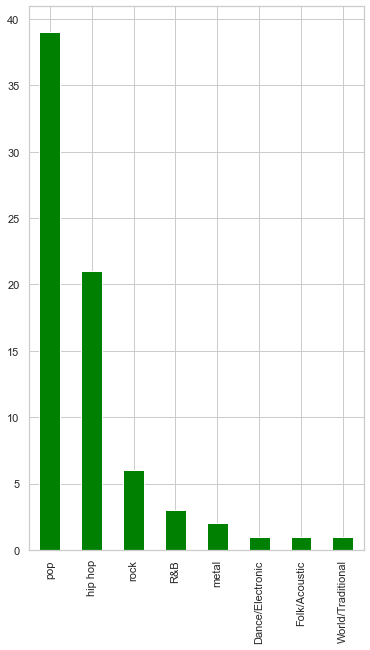

In [107]:

#el año 2000 comienza fuerte con el genero pop dejando atras a 
#otros generos imprtantes como el rock
print(generos_2000['genre'].value_counts().plot(kind='bar',color='green'))

In [108]:
#punto 6
# Sacamos la media de todas las variables para determinar como es el comportamiento de 
#estos tipos de genero

Pop =Taller_1_limpio[(Taller_1_limpio['genre']=='pop')]
Rock = Taller_1_limpio[(Taller_1_limpio['genre']=='rock')]

Pop_energy_mean=Pop['energy'].mean()
Pop_tempo_mean=Pop['tempo'].mean()
Rock_energy_mean=Rock['energy'].mean()
Rock_tempo_mean=Rock['tempo'].mean()
Pop_valence_mean=Pop['valence'].mean()
Rock_valence_mean=Rock['valence'].mean()

In [109]:
#Podemos obsevar que respecto a la energia el pop pierde pero respecto a 
# el valance (spotify lo define como nivel de felicidad) el pop tiene un promedio 
#mas alto respecto al po esto puede ser por el tipo de letra de las canciones
#igualmente el tempo respecto al pop es mayor esto se debe a que si tenemos una energia mayor puede que las 
#canciones tengan una velocidad mayor, mas freneticas respecto al genero pop

print(Pop_energy_mean*200)
print(Pop_tempo_mean)
print(Pop_valence_mean*200)

144.46268980477222
120.73800976138838
108.96681127982653


In [110]:
print(Rock_energy_mean*200)
print(Rock_tempo_mean)
print(Rock_valence_mean*200)

159.84
126.01106451612897
103.53600000000003


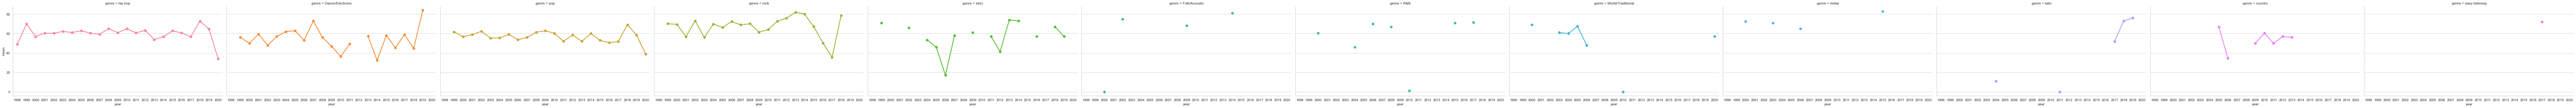

In [111]:
#punto 5 

#se realiza una funcion donde una variable dataFrame almacene  los diferentes tipos de año con su respectivo genero
#y su promedio de popularidad en ese año
#En la parte donde graficamos realizaremos un analisis de esto
comparar=Taller_1_limpio.groupby(['year','genre'])['popularity'].agg(['mean']).reset_index()

Genre = comparar.genre
Year = comparar.year
popularity = comparar.mean
comparar

#realizamos un grafico de lineas agrupandlo por años que permita visualizar a mayor escala como es que los generos
#se comporta su popularidad en los diferentes años, como podemos observar hip hop, dance/electronic, pop
# y rock presentan la mayor cantidad de geneos de musica , igualmene el rock aunque como en puntos anteriores vimos saca menos musica
#pero obtienen un gran rating de populairdad mayor a los demas generos 


#nota se demora en gnerar la afica de 10 a 20 seg, se puede hacer zoom sobre ella haciendo doble clic en las imagenes
sns.catplot(col="genre", x="year", hue="genre",
    y="mean", sharex=True, legend_out=True,
    kind="point",aspect =2 ,data=comparar)

In [112]:
#punto 7 - ¿Que relacion tienen los generos por año respecto a la bailabilidad?

#hipoteticamente se esperaria que el genero latin fuera el mas bailable pero se obtienen pocos regstos de esta respecto 
#a su media aun asi el genero como es Dance/electronic mantiene un nivl muy alto mas que todo en el boom del los 2002 
#a 2004 que es donde tiene una recepion de bailabolidad mas grande

Bailabilidad=Taller_1_limpio.groupby(['year','genre'])['instrumentalness'].agg(['mean']).reset_index()

#punto 7 -como se comporta el genero rock despues del año 2009 resepcto a su popularidad


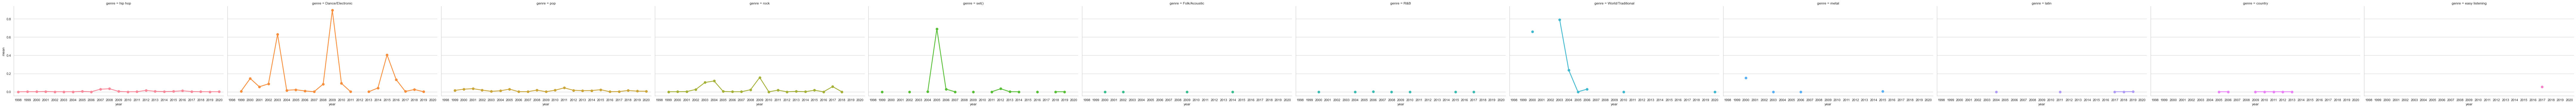

In [113]:
Bailabilidad

sns.catplot(col="genre", x="year", hue="genre",
    y="mean", sharex=True, legend_out=True,
    kind="point",aspect =2 ,data=Bailabilidad) #david